#Linear Programing In Python : Creating a Reading List

This iPython Notebook is an Example of Constructing a Linear Program in Python with PULP module.

----------
**Problem Formulation:**
You want to read the maximum number of books per year. However, at most you can only read for 5 hours per week. What should your reading list look like if you want to cover most of New York Times Best Seller List 

**Assuming that average speed of reading The average reader snails through prose at a rate of about 250-300 words per minute, which roughly equates to about one page per minute, we assume 60 pages/ hour is the regular speed.

----------
> - Objective: Maximizr Number of Books Read
> - LP Form: Maximization
> - Decision Variables: Binary Variables whether we should read the book or not.
> - Constrains: Limited Number of Time available to read per week

In [1]:
from pulp import *
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

**Getting the Data**
>There are pleanty of websites where one can find a daily doze of reading inspiration.
The dataset from this problem was scraped from Goodreads New York Times Bestseller List https://www.goodreads.com/list/show/83612.NY_Times_Fiction_Best_Sellers_2015

![Goodreads](https://photos-3.dropbox.com/t/2/AAABxo9p6Gnd2GPATcS1kEXp2dNCUwocH7KFQ6mxzr1Ghw/12/49846494/png/32x32/1/_/1/2/goodreads.png/ENCbqCYY-KgMIAEoAQ/I3Eo2J7_XFwtbFY5WUwx4u9zwRzxGXT11d76Y19FfzI?size=1024x768&size_mode=2)


>The resulting dataset contains:
> - Book Name
> - Author
> - Goodreads Rating
> - Goodreads Score
> - Number of Pages

In [12]:
data = pd.read_csv('goodreads_bestsellers.csv')
data[:5]

,_position,book_name,goodreads_score,author,rating,url,my_column/_source,rating.1,total_ratings,pages
0,1,All the Light We Cannot See,3288,Anthony Doerr,"4.29 of 5 stars 4.29 avg rating „ 179,342 ratings",https://www.goodreads.com/book/show/18143977-a...,/book/show/18143977-all-the-light-we-cannot-see,4.29,179342,530
1,2,The Fault in Our Stars,2471,John Green,"4.36 of 5 stars 4.36 avg rating „ 1,577,550 ra...",https://www.goodreads.com/book/show/11870085-t...,/book/show/11870085-the-fault-in-our-stars,4.36,1577550,313
2,3,The Nightingale,2196,Kristin Hannah,"4.54 of 5 stars 4.54 avg rating „ 52,099 ratings",https://www.goodreads.com/book/show/21853621-t...,/book/show/21853621-the-nightingale,4.54,52099,438
3,4,The Girl on the Train,2188,Paula Hawkins,"3.86 of 5 stars 3.86 avg rating „ 282,985 ratings",https://www.goodreads.com/book/show/22557272-t...,/book/show/22557272-the-girl-on-the-train,3.86,282985,323
4,5,Gone Girl,1756,Gillian Flynn,"3.98 of 5 stars 3.98 avg rating „ 1,083,869 ra...",https://www.goodreads.com/book/show/19288043-g...,/book/show/19288043-gone-girl,3.98,1083869,422


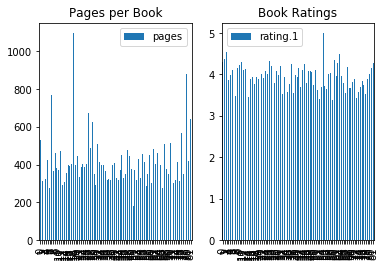

In [14]:
fig, axs = plt.subplots(1,2)
my_plot = data[['book_name', 'pages']].plot(kind='bar', title="Pages per Book", ax=axs[0])
my_plot = data[['book_name', 'rating.1']].plot(kind='bar', title="Book Ratings", ax=axs[1])
# my_plot.set_xlabel("destination")

**Setting Up LP Problem:**

> Define The LP Object

> The *prob* variable is created to contain the formulation, and the usual parameters are passed into LpProblem.

In [15]:
# create the LP object, set up as a maximization problem --> since we want to maximize the number of books we read in a year
prob = pulp.LpProblem('BuyingBestsellers', pulp.LpMaximize)

> Create Decision Variables:

In [17]:
#create decision - yes or no to buy the book?
decision_variables = []
for rownum, row in data.iterrows():
	variable = str('x' + str(rownum))
	variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat= 'Integer') #make variables binary
	decision_variables.append(variable)

print ("Total number of decision_variables: " + str(len(decision_variables)))
print ("Array with Decision Variables:" + str(decision_variables))

Total number of decision_variables: 82
Array with Decision Variables:[x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40, x41, x42, x43, x44, x45, x46, x47, x48, x49, x50, x51, x52, x53, x54, x55, x56, x57, x58, x59, x60, x61, x62, x63, x64, x65, x66, x67, x68, x69, x70, x71, x72, x73, x74, x75, x76, x77, x78, x79, x80, x81]


> Define Objective Function: (*Maximize the Number of Books we are going to read*)

> The variable prob now begins collecting problem data with the += operator. The objective function is logically entered first, with an important comma , at the end of the statement and a short string explaining what this objective function is:

In [18]:
#create optimization function
total_books = ""
for i, book in enumerate(decision_variables):
	total_books += book

prob += total_books
print ("Optimization function: " + str(total_books))	

Optimization function: x0 + x1 + x10 + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18 + x19 + x2 + x20 + x21 + x22 + x23 + x24 + x25 + x26 + x27 + x28 + x29 + x3 + x30 + x31 + x32 + x33 + x34 + x35 + x36 + x37 + x38 + x39 + x4 + x40 + x41 + x42 + x43 + x44 + x45 + x46 + x47 + x48 + x49 + x5 + x50 + x51 + x52 + x53 + x54 + x55 + x56 + x57 + x58 + x59 + x6 + x60 + x61 + x62 + x63 + x64 + x65 + x66 + x67 + x68 + x69 + x7 + x70 + x71 + x72 + x73 + x74 + x75 + x76 + x77 + x78 + x79 + x8 + x80 + x81 + x9


> Define Constrains: (*We have a Fixed Number of time to read books and Fixed Speed of Reading *)

In [20]:
hours_week_read = 5
pages_per_hour = 60

In [21]:
#create constrains - there are only 365 days

total_pages_needs_to_read = ""
for rownum, row in data.iterrows():
	for i, schedule in enumerate(decision_variables):
		if rownum == i:
			formula = row['pages']*schedule
			total_pages_needs_to_read += formula

total_pages_can_read = 52*hours_week_read*pages_per_hour

prob += (total_pages_needs_to_read == total_pages_can_read)


>The Final Format

In [23]:
print (prob)
prob.writeLP("BuyingBestsellers.lp" )

BuyingBestsellers:
MAXIMIZE
1*x0 + 1*x1 + 1*x10 + 1*x11 + 1*x12 + 1*x13 + 1*x14 + 1*x15 + 1*x16 + 1*x17 + 1*x18 + 1*x19 + 1*x2 + 1*x20 + 1*x21 + 1*x22 + 1*x23 + 1*x24 + 1*x25 + 1*x26 + 1*x27 + 1*x28 + 1*x29 + 1*x3 + 1*x30 + 1*x31 + 1*x32 + 1*x33 + 1*x34 + 1*x35 + 1*x36 + 1*x37 + 1*x38 + 1*x39 + 1*x4 + 1*x40 + 1*x41 + 1*x42 + 1*x43 + 1*x44 + 1*x45 + 1*x46 + 1*x47 + 1*x48 + 1*x49 + 1*x5 + 1*x50 + 1*x51 + 1*x52 + 1*x53 + 1*x54 + 1*x55 + 1*x56 + 1*x57 + 1*x58 + 1*x59 + 1*x6 + 1*x60 + 1*x61 + 1*x62 + 1*x63 + 1*x64 + 1*x65 + 1*x66 + 1*x67 + 1*x68 + 1*x69 + 1*x7 + 1*x70 + 1*x71 + 1*x72 + 1*x73 + 1*x74 + 1*x75 + 1*x76 + 1*x77 + 1*x78 + 1*x79 + 1*x8 + 1*x80 + 1*x81 + 1*x9 + 0
SUBJECT TO
_C1: 530 x0 + 313 x1 + 369 x10 + 470 x11 + 294 x12 + 309 x13 + 358 x14
 + 396 x15 + 392 x16 + 405 x17 + 1098 x18 + 398 x19 + 438 x2 + 447 x20
 + 336 x21 + 387 x22 + 405 x23 + 388 x24 + 404 x25 + 674 x26 + 487 x27
 + 624 x28 + 352 x29 + 323 x3 + 291 x30 + 511 x31 + 415 x32 + 400 x33
 + 397 x34 + 368 x35 + 320 x36

> The Actual Optimization:

In [24]:
#now run optimization
optimization_result = prob.solve()
assert optimization_result == pulp.LpStatusOptimal
print("Status:", LpStatus[prob.status])
# print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
for v in prob.variables():
	print(v.name, "=", v.varValue)

Status: Optimal
Individual decision_variables: 
x0 = 0.0
x1 = 1.0
x10 = 1.0
x11 = 0.0
x12 = 1.0
x13 = 1.0
x14 = 1.0
x15 = 0.0
x16 = 1.0
x17 = 0.0
x18 = 0.0
x19 = 0.0
x2 = 0.0
x20 = 0.0
x21 = 1.0
x22 = 1.0
x23 = 0.0
x24 = 1.0
x25 = 1.0
x26 = 0.0
x27 = 0.0
x28 = 0.0
x29 = 1.0
x3 = 1.0
x30 = 1.0
x31 = 0.0
x32 = 0.0
x33 = 1.0
x34 = 0.0
x35 = 1.0
x36 = 1.0
x37 = 1.0
x38 = 1.0
x39 = 0.0
x4 = 0.0
x40 = 0.0
x41 = 1.0
x42 = 1.0
x43 = 1.0
x44 = 0.0
x45 = 1.0
x46 = 1.0
x47 = 0.0
x48 = 0.0
x49 = 1.0
x5 = 1.0
x50 = 1.0
x51 = 1.0
x52 = 1.0
x53 = 0.0
x54 = 1.0
x55 = 0.0
x56 = 0.0
x57 = 1.0
x58 = 1.0
x59 = 0.0
x6 = 0.0
x60 = 1.0
x61 = 0.0
x62 = 1.0
x63 = 0.0
x64 = 1.0
x65 = 1.0
x66 = 1.0
x67 = 0.0
x68 = 1.0
x69 = 1.0
x7 = 1.0
x70 = 0.0
x71 = 1.0
x72 = 1.0
x73 = 1.0
x74 = 0.0
x75 = 1.0
x76 = 0.0
x77 = 1.0
x78 = 1.0
x79 = 0.0
x8 = 0.0
x80 = 0.0
x81 = 0.0
x9 = 1.0


In [26]:
#reorder results
variable_name = []
variable_value = []

for v in prob.variables():
	variable_name.append(v.name)
	variable_value.append(v.varValue)

df = pd.DataFrame({'variable': variable_name, 'value': variable_value})
for rownum, row in df.iterrows():
	value = re.findall(r'(\d+)', row['variable'])
	df.loc[rownum, 'variable'] = int(value[0])

df = df.sort_values(by='variable')

#append results
for rownum, row in data.iterrows():
	for results_rownum, results_row in df.iterrows():
		if rownum == results_row['variable']:
			data.loc[rownum, 'decision'] = results_row['value']

In [27]:
data[data['decision'] == 1]

,_position,book_name,goodreads_score,author,rating,url,my_column/_source,rating.1,total_ratings,pages,decision
1,2,The Fault in Our Stars,2471,John Green,"4.36 of 5 stars 4.36 avg rating „ 1,577,550 ra...",https://www.goodreads.com/book/show/11870085-t...,/book/show/11870085-the-fault-in-our-stars,4.36,1577550,313,1.0
3,4,The Girl on the Train,2188,Paula Hawkins,"3.86 of 5 stars 3.86 avg rating „ 282,985 ratings",https://www.goodreads.com/book/show/22557272-t...,/book/show/22557272-the-girl-on-the-train,3.86,282985,323,1.0
5,6,Orphan Train,1581,Christina Baker Kline,"4.1 of 5 stars 4.10 avg rating „ 150,431 ratings",https://www.goodreads.com/book/show/15818107-o...,/book/show/15818107-orphan-train,4.10,150431,278,1.0
7,8,Gray Mountain,1191,John Grisham,"3.47 of 5 stars 3.47 avg rating „ 30,770 ratings",https://www.goodreads.com/book/show/20707959-g...,/book/show/20707959-gray-mountain,3.47,30770,368,1.0
9,10,The Invention of Wings,1165,Sue Monk Kidd,"4.22 of 5 stars 4.22 avg rating „ 117,127 ratings",https://www.goodreads.com/book/show/18079776-t...,/book/show/18079776-the-invention-of-wings,4.22,117127,384,1.0
10,11,Me Before You,1070,Jojo Moyes,"4.3 of 5 stars 4.30 avg rating „ 234,030 ratings",https://www.goodreads.com/book/show/15507958-m...,/book/show/15507958-me-before-you,4.30,234030,369,1.0
12,13,Sarah's Key,981,Tatiana de Rosnay,"4.12 of 5 stars 4.12 avg rating „ 286,227 ratings",https://www.goodreads.com/book/show/556602.Sar...,/book/show/556602.Sarah_s_Key,4.12,286227,294,1.0
13,14,Before I Go,795,Colleen Oakley,"3.8 of 5 stars 3.80 avg rating „ 5,613 ratings",https://www.goodreads.com/book/show/20871704-b...,/book/show/20871704-before-i-go,3.80,5613,309,1.0
14,15,A Spool of Blue Thread,684,Anne Tyler,"3.46 of 5 stars 3.46 avg rating „ 20,403 ratings",https://www.goodreads.com/book/show/22501028-a...,/book/show/22501028-a-spool-of-blue-thread,3.46,20403,358,1.0
16,17,As Chimney Sweepers Come to Dust (Flavia de Lu...,596,Alan Bradley,"3.93 of 5 stars 3.93 avg rating „ 8,623 ratings",https://www.goodreads.com/book/show/21874813-a...,/book/show/21874813-as-chimney-sweepers-come-t...,3.93,8623,392,1.0


In [29]:
len(data[data['decision'] == 1])

46